<a href="https://colab.research.google.com/github/Alfonso40-COL/quantum-microgrid-optimization-qaoa/blob/main/METODOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generando figura completa de metodología...


NameError: name 'grobi_config' is not defined

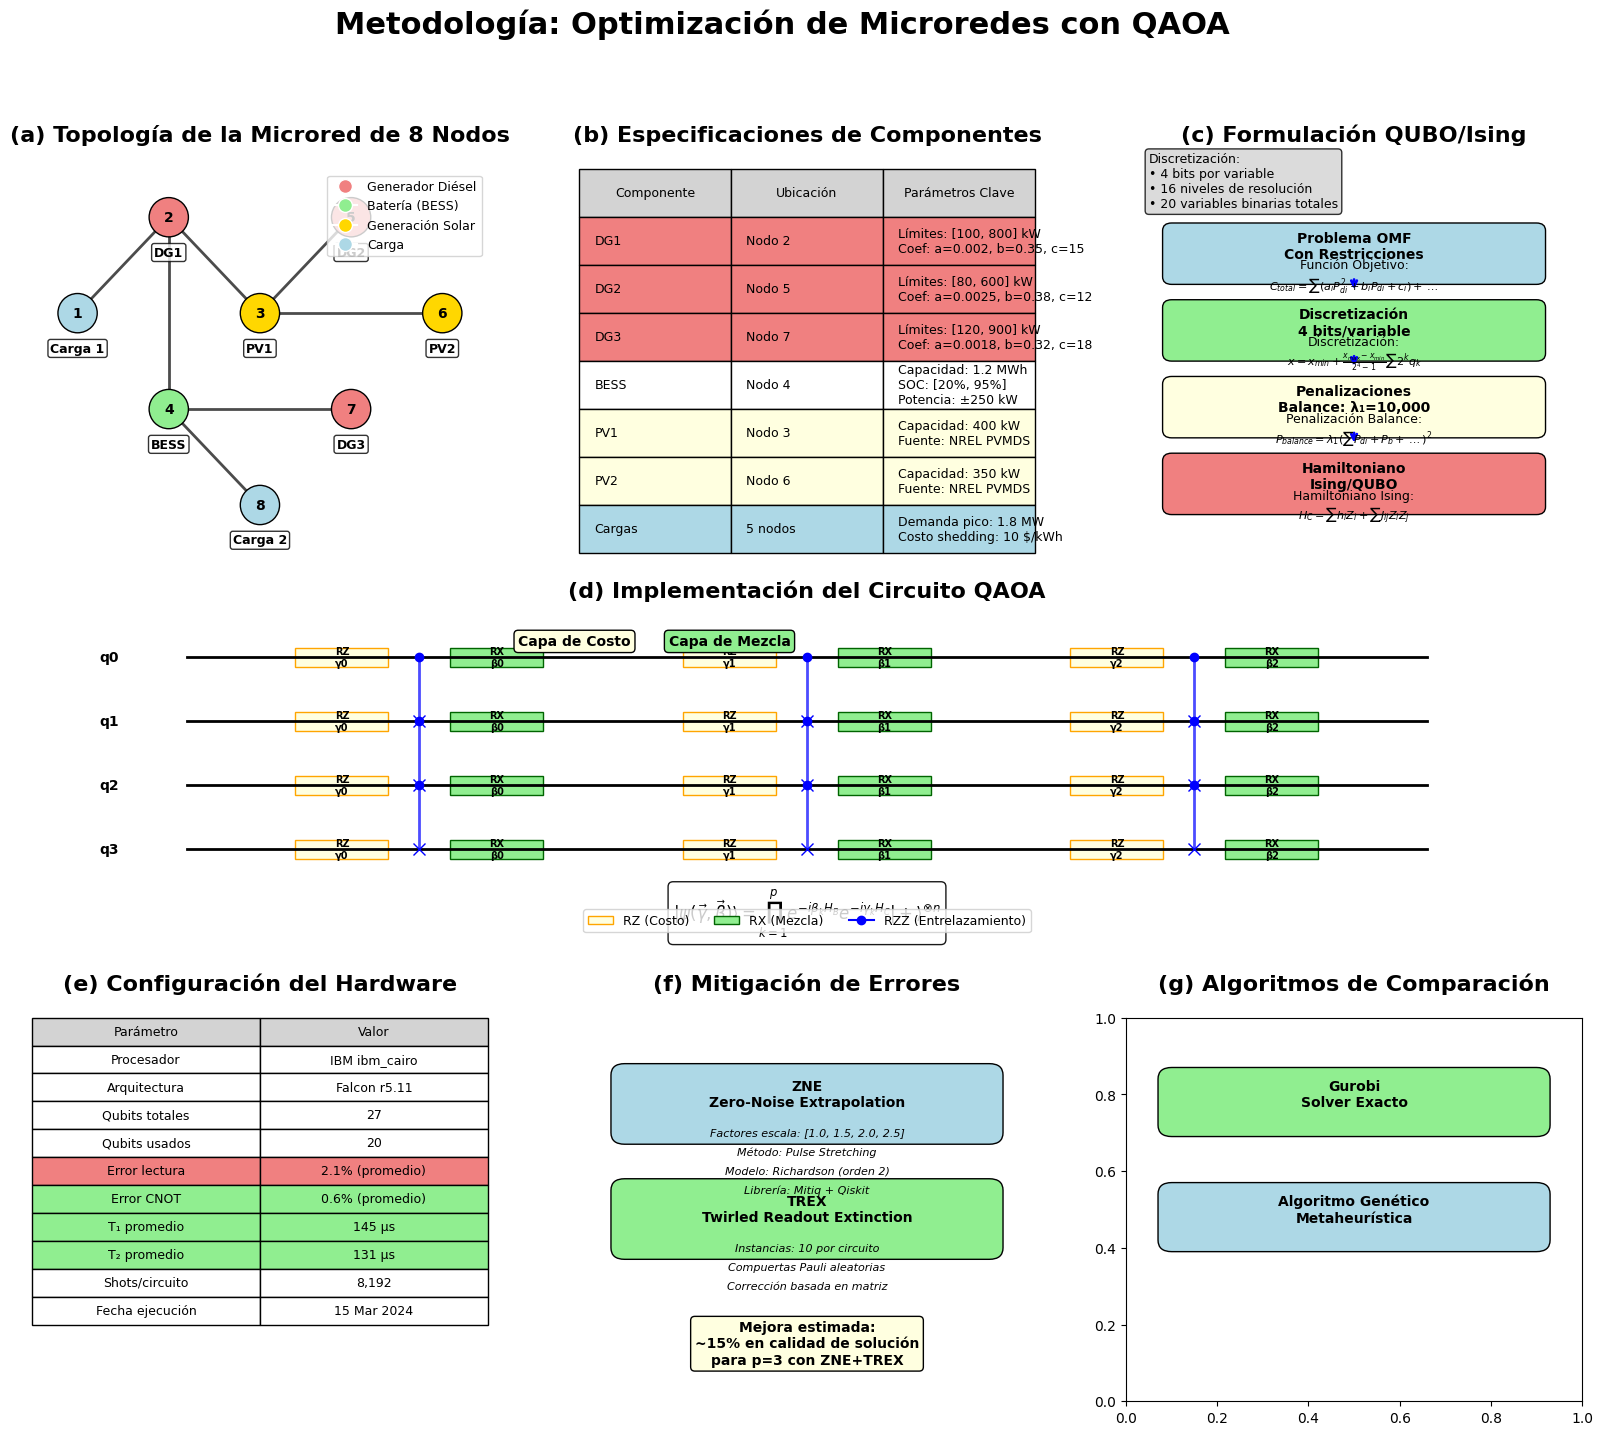

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib.patches import FancyBboxPatch, Circle, Rectangle, ConnectionPatch
import networkx as nx

def create_methodology_figure():
    """Crea una figura completa que visualiza la metodología del estudio"""

    # Crear figura principal
    fig = plt.figure(figsize=(20, 16))
    fig.suptitle('Metodología: Optimización de Microredes con QAOA',
                 fontsize=22, fontweight='bold', y=0.98)

    # Definir grid complejo para múltiples paneles
    gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 1], height_ratios=[1.2, 1, 1.2])

    # --- Panel 1: Topología de la Microred de 8 Nodos ---
    ax1 = plt.subplot(gs[0, 0])
    plot_microgrid_topology(ax1)

    # --- Panel 2: Especificaciones de Componentes ---
    ax2 = plt.subplot(gs[0, 1])
    plot_component_specifications(ax2)

    # --- Panel 3: Formulación QUBO/Ising ---
    ax3 = plt.subplot(gs[0, 2])
    plot_qubo_formulation(ax3)

    # --- Panel 4: Implementación de QAOA ---
    ax4 = plt.subplot(gs[1, :])
    plot_qaoa_implementation(ax4)

    # --- Panel 5: Configuración Experimental ---
    ax5 = plt.subplot(gs[2, 0])
    plot_experimental_setup(ax5)

    # --- Panel 6: Mitigación de Errores ---
    ax6 = plt.subplot(gs[2, 1])
    plot_error_mitigation(ax6)

    # --- Panel 7: Algoritmos de Comparación ---
    ax7 = plt.subplot(gs[2, 2])
    plot_comparison_algorithms(ax7)

    plt.tight_layout()

    # Guardar con alta resolución
    plt.savefig('figura_metodologia_completa.png',
                dpi=600,
                bbox_inches='tight',
                facecolor='white',
                edgecolor='none')

    plt.show()

def plot_microgrid_topology(ax):
    """Dibuja la topología de la microred de 8 nodos"""
    ax.set_title('(a) Topología de la Microred de 8 Nodos',
                 fontsize=16, fontweight='bold', pad=20)

    # Crear grafo para la microred
    G = nx.Graph()

    # Definir nodos y sus posiciones
    nodes = list(range(1, 9))
    positions = {
        1: (0, 2), 2: (1, 3), 3: (2, 2), 4: (1, 1),
        5: (3, 3), 6: (4, 2), 7: (3, 1), 8: (2, 0)
    }

    # Añadir nodos
    for node in nodes:
        G.add_node(node)

    # Añadir conexiones (topología radial típica)
    edges = [(1,2), (2,3), (2,4), (3,5), (3,6), (4,7), (4,8)]
    G.add_edges_from(edges)

    # Colores para diferentes tipos de nodos
    node_colors = []
    for node in nodes:
        if node in [2, 5, 7]:  # Generadores diésel
            node_colors.append('lightcoral')
        elif node == 4:  # Batería
            node_colors.append('lightgreen')
        elif node in [3, 6]:  # Solar
            node_colors.append('gold')
        else:  # Cargas
            node_colors.append('lightblue')

    # Dibujar el grafo
    nx.draw_networkx_nodes(G, positions, node_size=800,
                          node_color=node_colors, edgecolors='black', ax=ax)
    nx.draw_networkx_edges(G, positions, width=2, alpha=0.7, ax=ax)
    nx.draw_networkx_labels(G, positions, font_size=10, font_weight='bold', ax=ax)

    # Añadir etiquetas de componentes
    component_labels = {
        2: 'DG1', 5: 'DG2', 7: 'DG3',  # Generadores diésel
        4: 'BESS',  # Batería
        3: 'PV1', 6: 'PV2',  # Solar
        1: 'Carga 1', 8: 'Carga 2'  # Cargas
    }

    for node, label in component_labels.items():
        x, y = positions[node]
        ax.text(x, y - 0.3, label, ha='center', va='top',
               fontsize=9, fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

    ax.set_xlim(-0.5, 4.5)
    ax.set_ylim(-0.5, 3.5)
    ax.axis('off')

    # Leyenda de componentes
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightcoral',
                  markersize=10, label='Generador Diésel'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen',
                  markersize=10, label='Batería (BESS)'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gold',
                  markersize=10, label='Generación Solar'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue',
                  markersize=10, label='Carga')
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=9)

def plot_component_specifications(ax):
    """Muestra las especificaciones de los componentes de la microred"""
    ax.set_title('(b) Especificaciones de Componentes',
                 fontsize=16, fontweight='bold', pad=20)

    # Datos de los componentes
    components_data = [
        ['Componente', 'Ubicación', 'Parámetros Clave'],
        ['DG1', 'Nodo 2', 'Límites: [100, 800] kW\nCoef: a=0.002, b=0.35, c=15'],
        ['DG2', 'Nodo 5', 'Límites: [80, 600] kW\nCoef: a=0.0025, b=0.38, c=12'],
        ['DG3', 'Nodo 7', 'Límites: [120, 900] kW\nCoef: a=0.0018, b=0.32, c=18'],
        ['BESS', 'Nodo 4', 'Capacidad: 1.2 MWh\nSOC: [20%, 95%]\nPotencia: ±250 kW'],
        ['PV1', 'Nodo 3', 'Capacidad: 400 kW\nFuente: NREL PVMDS'],
        ['PV2', 'Nodo 6', 'Capacidad: 350 kW\nFuente: NREL PVMDS'],
        ['Cargas', '5 nodos', 'Demanda pico: 1.8 MW\nCosto shedding: 10 $/kWh']
    ]

    # Crear tabla
    ax.axis('tight')
    ax.axis('off')

    table = ax.table(cellText=components_data[1:],
                    colLabels=components_data[0],
                    colColours=['lightgray'] * 3,
                    cellLoc='left',
                    loc='center',
                    bbox=[0, 0, 1, 1])

    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.8)

    # Colorear filas por tipo de componente
    color_mapping = {
        'DG': 'lightcoral',
        'BESS': 'lightgreen',
        'PV': 'lightyellow',
        'Cargas': 'lightblue'
    }

    for i in range(1, len(components_data)):
        component_type = components_data[i][0][:2] if components_data[i][0] != 'Cargas' else 'Cargas'
        color = color_mapping.get(component_type, 'white')
        for j in range(3):
            table[(i, j)].set_facecolor(color)

def plot_qubo_formulation(ax):
    """Visualiza el proceso de formulación QUBO"""
    ax.set_title('(c) Formulación QUBO/Ising',
                 fontsize=16, fontweight='bold', pad=20)

    # Dibujar el proceso de conversión
    steps = [
        (0.5, 0.8, "Problema OMF\nCon Restricciones", "lightblue"),
        (0.5, 0.6, "Discretización\n4 bits/variable", "lightgreen"),
        (0.5, 0.4, "Penalizaciones\nBalance: λ₁=10,000", "lightyellow"),
        (0.5, 0.2, "Hamiltoniano\nIsing/QUBO", "lightcoral")
    ]

    for x, y, text, color in steps:
        box = FancyBboxPatch((x-0.4, y-0.08), 0.8, 0.12,
                            boxstyle="round,pad=0.02",
                            facecolor=color, edgecolor='black')
        ax.add_patch(box)
        ax.text(x, y, text, ha='center', va='center',
               fontsize=10, fontweight='bold')

    # Flechas entre pasos
    for i in range(len(steps)-1):
        ax.annotate('', xy=(steps[i+1][0], steps[i+1][1] + 0.08),
                   xytext=(steps[i][0], steps[i][1] - 0.08),
                   arrowprops=dict(arrowstyle='->', lw=2, color='blue'))

    # Mostrar ecuaciones clave
    equations = [
        (0.5, 0.75, "Función Objetivo:"),
        (0.5, 0.7, r"$C_{total} = \sum(a_i P_{di}^2 + b_i P_{di} + c_i) + \dots$"),
        (0.5, 0.55, "Discretización:"),
        (0.5, 0.5, r"$x = x_{min} + \frac{x_{max}-x_{min}}{2^4-1}\sum 2^k q_k$"),
        (0.5, 0.35, "Penalización Balance:"),
        (0.5, 0.3, r"$P_{balance} = \lambda_1 (\sum P_{di} + P_b + \dots)^2$"),
        (0.5, 0.15, "Hamiltoniano Ising:"),
        (0.5, 0.1, r"$H_C = \sum h_i Z_i + \sum J_{ij} Z_i Z_j$")
    ]

    for x, y, eq in equations:
        ax.text(x, y, eq, ha='center', va='center', fontsize=8 if '=' in eq else 9)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    # Información de discretización
    info_text = "Discretización:\n• 4 bits por variable\n• 16 niveles de resolución\n• 20 variables binarias totales"
    ax.text(0.05, 0.9, info_text, fontsize=9,
           bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

def plot_qaoa_implementation(ax):
    """Visualiza la implementación de QAOA"""
    ax.set_title('(d) Implementación del Circuito QAOA',
                 fontsize=16, fontweight='bold', pad=20)

    # Parámetros
    num_qubits = 4  # Mostrar solo 4 qubits para simplificar
    depth = 3

    # Dibujar líneas de qubits
    for i in range(num_qubits):
        y = 0.9 - i * 0.2
        ax.plot([0.1, 0.9], [y, y], 'k-', linewidth=2)
        ax.text(0.05, y, f'q{i}', ha='center', va='center',
               fontweight='bold', fontsize=10)

    # Dibujar capas QAOA
    for p in range(depth):
        x_start = 0.2 + p * 0.25

        # Capa de costo (RZ y RZZ)
        for i in range(num_qubits):
            y = 0.9 - i * 0.2
            # Compuerta RZ
            rect = Rectangle((x_start - 0.03, y - 0.03), 0.06, 0.06,
                           facecolor='lightyellow', edgecolor='orange')
            ax.add_patch(rect)
            ax.text(x_start, y, f'RZ\nγ{p}', ha='center', va='center',
                   fontsize=7, fontweight='bold')

        # Algunas compuertas RZZ (entrelazamiento)
        if num_qubits >= 2:
            for i in range(num_qubits - 1):
                y1 = 0.9 - i * 0.2
                y2 = 0.9 - (i + 1) * 0.2
                ax.plot([x_start + 0.05, x_start + 0.05], [y1, y2],
                       'b-', linewidth=2, alpha=0.7)
                ax.plot(x_start + 0.05, y1, 'bo', markersize=6)
                ax.plot(x_start + 0.05, y2, 'bx', markersize=8, linewidth=2)

        # Capa de mezcla (RX)
        x_mixer = x_start + 0.1
        for i in range(num_qubits):
            y = 0.9 - i * 0.2
            rect = Rectangle((x_mixer - 0.03, y - 0.03), 0.06, 0.06,
                           facecolor='lightgreen', edgecolor='darkgreen')
            ax.add_patch(rect)
            ax.text(x_mixer, y, f'RX\nβ{p}', ha='center', va='center',
                   fontsize=7, fontweight='bold')

    # Etiquetas de las capas
    ax.text(0.35, 0.95, 'Capa de Costo', ha='center', va='center',
           fontweight='bold', fontsize=10,
           bbox=dict(boxstyle='round', facecolor='lightyellow'))
    ax.text(0.45, 0.95, 'Capa de Mezcla', ha='center', va='center',
           fontweight='bold', fontsize=10,
           bbox=dict(boxstyle='round', facecolor='lightgreen'))

    # Fórmula del circuito
    circuit_formula = r"$|\psi(\vec{\gamma},\vec{\beta})\rangle = \prod_{k=1}^p e^{-i\beta_k H_B} e^{-i\gamma_k H_C} |+\rangle^{\otimes n}$"
    ax.text(0.5, 0.1, circuit_formula, ha='center', va='center',
           fontsize=12, bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    # Leyenda de compuertas
    legend_elements = [
        Rectangle((0,0), 1, 1, facecolor='lightyellow', edgecolor='orange',
                 label='RZ (Costo)'),
        Rectangle((0,0), 1, 1, facecolor='lightgreen', edgecolor='darkgreen',
                 label='RX (Mezcla)'),
        plt.Line2D([0], [0], color='blue', marker='o', linestyle='-',
                  label='RZZ (Entrelazamiento)')
    ]
    ax.legend(handles=legend_elements, loc='lower center',
             bbox_to_anchor=(0.5, 0.02), ncol=3, fontsize=9)

def plot_experimental_setup(ax):
    """Muestra la configuración experimental del hardware"""
    ax.set_title('(e) Configuración del Hardware',
                 fontsize=16, fontweight='bold', pad=20)

    # Información del hardware
    hardware_info = [
        ['Parámetro', 'Valor'],
        ['Procesador', 'IBM ibm_cairo'],
        ['Arquitectura', 'Falcon r5.11'],
        ['Qubits totales', '27'],
        ['Qubits usados', '20'],
        ['Error lectura', '2.1% (promedio)'],
        ['Error CNOT', '0.6% (promedio)'],
        ['T₁ promedio', '145 μs'],
        ['T₂ promedio', '131 μs'],
        ['Shots/circuito', '8,192'],
        ['Fecha ejecución', '15 Mar 2024']
    ]

    ax.axis('tight')
    ax.axis('off')

    table = ax.table(cellText=hardware_info[1:],
                    colLabels=hardware_info[0],
                    colColours=['lightgray'] * 2,
                    cellLoc='center',
                    loc='center',
                    bbox=[0, 0.2, 1, 0.8])

    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.5)

    # Colorear filas según métricas de calidad
    for i in range(1, len(hardware_info)):
        if 'Error' in hardware_info[i][0]:
            color = 'lightcoral' if float(hardware_info[i][1].split('%')[0]) > 1.0 else 'lightgreen'
        elif 'T' in hardware_info[i][0]:
            color = 'lightgreen' if float(hardware_info[i][1].split(' ')[0]) > 100 else 'lightyellow'
        else:
            color = 'white'
        table[(i, 0)].set_facecolor(color)
        table[(i, 1)].set_facecolor(color)

def plot_error_mitigation(ax):
    """Visualiza las técnicas de mitigación de errores"""
    ax.set_title('(f) Mitigación de Errores',
                 fontsize=16, fontweight='bold', pad=20)

    # Técnicas de mitigación
    techniques = [
        (0.5, 0.8, "ZNE\nZero-Noise Extrapolation", "lightblue"),
        (0.5, 0.5, "TREX\nTwirled Readout Extinction", "lightgreen")
    ]

    for x, y, text, color in techniques:
        box = FancyBboxPatch((x-0.4, y-0.1), 0.8, 0.15,
                            boxstyle="round,pad=0.03",
                            facecolor=color, edgecolor='black')
        ax.add_patch(box)
        ax.text(x, y, text, ha='center', va='center',
               fontsize=10, fontweight='bold')

    # Detalles de ZNE
    zne_details = [
        "Factores escala: [1.0, 1.5, 2.0, 2.5]",
        "Método: Pulse Stretching",
        "Modelo: Richardson (orden 2)",
        "Librería: Mitiq + Qiskit"
    ]

    for i, detail in enumerate(zne_details):
        ax.text(0.5, 0.7 - i * 0.05, detail, ha='center', va='center',
               fontsize=8, style='italic')

    # Detalles de TREX
    trex_details = [
        "Instancias: 10 por circuito",
        "Compuertas Pauli aleatorias",
        "Corrección basada en matriz"
    ]

    for i, detail in enumerate(trex_details):
        ax.text(0.5, 0.4 - i * 0.05, detail, ha='center', va='center',
               fontsize=8, style='italic')

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    # Efecto de mitigación
    improvement_text = "Mejora estimada:\n~15% en calidad de solución\npara p=3 con ZNE+TREX"
    ax.text(0.5, 0.15, improvement_text, ha='center', va='center',
           fontsize=10, fontweight='bold',
           bbox=dict(boxstyle='round', facecolor='lightyellow'))

def plot_comparison_algorithms(ax):
    """Muestra los algoritmos clásicos de comparación"""
    ax.set_title('(g) Algoritmos de Comparación',
                 fontsize=16, fontweight='bold', pad=20)

    # Algoritmos de comparación
    algorithms = [
        (0.5, 0.8, "Gurobi\nSolver Exacto", "lightgreen"),
        (0.5, 0.5, "Algoritmo Genético\nMetaheurística", "lightblue")
    ]

    for x, y, text, color in algorithms:
        box = FancyBboxPatch((x-0.4, y-0.08), 0.8, 0.12,
                            boxstyle="round,pad=0.03",
                            facecolor=color, edgecolor='black')
        ax.add_patch(box)
        ax.text(x, y, text, ha='center', va='center',
               fontsize=10, fontweight='bold')

    # Configuración Gurobi
    gurobi_config = [
        "Software: Gurobi v9.5.2",
        "Formulación: MIQP",
        "Optimality gap: 1e-6",
        "Hardware: 48 cores, 384GB RAM"
    ]

    for i, config in enumerate(grobi_config):
        ax.text(0.5, 0.7 - i * 0.04, config, ha='center', va='center',
               fontsize=8)

    # Configuración Algoritmo Genético
    ga_config = [
        "Framework: DEAP v1.3.3",
        "Población: 500 individuos",
        "Generaciones: 500",
        "Ejecuciones: 10 independientes"
    ]

    for i, config in enumerate(ga_config):
        ax.text(0.5, 0.4 - i * 0.04, config, ha='center', va='center',
               fontsize=8)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    # Entorno computacional unificado
    env_text = "Entorno Unificado:\n• Ubuntu 20.04 LTS\n• Python 3.9.12\n• Qiskit 0.39.4\n• Mismas condiciones"
    ax.text(0.5, 0.15, env_text, ha='center', va='center',
           fontsize=9, bbox=dict(boxstyle='round', facecolor='lightgray'))

# Ejecutar la creación de la figura completa
if __name__ == "__main__":
    print("Generando figura completa de metodología...")
    create_methodology_figure()
    print("Figura generada exitosamente: 'figura_metodologia_completa.png'")

# Task
The `NameError` occurs because of a typo: `grobi_config` should be `gurobi_config` in the `plot_comparison_algorithms` function.

Let's correct that and then provide the full, runnable code to generate the figure.

```python
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib.patches import FancyBboxPatch, Circle, Rectangle, ConnectionPatch
import networkx as nx

def create_methodology_figure():
    """Crea una figura completa que visualiza la metodología del estudio"""

    # Crear figura principal
    fig = plt.figure(figsize=(20, 16))
    fig.suptitle('Metodología: Optimización de Microredes con QAOA',
                 fontsize=22, fontweight='bold', y=0.98)

    # Definir grid complejo para múltiples paneles
    gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 1], height_ratios=[1.2, 1, 1.2])

    # --- Panel 1: Topología de la Microred de 8 Nodos ---
    ax1 = plt.subplot(gs[0, 0])
    plot_microgrid_topology(ax1)

    # --- Panel 2: Especificaciones de Componentes ---
    ax2 = plt.subplot(gs[0, 1])
    plot_component_specifications(ax2)

    # --- Panel 3: Formulación QUBO/Ising ---
    ax3 = plt.subplot(gs[0, 2])
    plot_qubo_formulation(ax3)

    # --- Panel 4: Implementación de QAOA ---
    ax4 = plt.subplot(gs[1, :])
    plot_qaoa_implementation(ax4)

    # --- Panel 5: Configuración Experimental ---
    ax5 = plt.subplot(gs[2, 0])
    plot_experimental_setup(ax5)

    # --- Panel 6: Mitigación de Errores ---
    ax6 = plt.subplot(gs[2, 1])
    plot_error_mitigation(ax6)

    # --- Panel 7: Algoritmos de Comparación ---
    ax7 = plt.subplot(gs[2, 2])
    plot_comparison_algorithms(ax7)

    plt.tight_layout()

    # Guardar con alta resolución
    plt.savefig('figura_metodologia_completa.png',
                dpi=600,
                bbox_inches='tight',
                facecolor='white',
                edgecolor='none')

    plt.show()

def plot_microgrid_topology(ax):
    """Dibuja la topología de la microred de 8 nodos"""
    ax.set_title('(a) Topología de la Microred de 8 Nodos',
                 fontsize=16, fontweight='bold', pad=20)

    # Crear grafo para la microred
    G = nx.Graph()

    # Definir nodos y sus posiciones
    nodes = list(range(1, 9))
    positions = {
        1: (0, 2), 2: (1, 3), 3: (2, 2), 4: (1, 1),
        5: (3, 3), 6: (4, 2), 7: (3, 1), 8: (2, 0)
    }

    # Añadir nodos
    for node in nodes:
        G.add_node(node)

    # Añadir conexiones (topología radial típica)
    edges = [(1,2), (2,3), (2,4), (3,5), (3,6), (4,7), (4,8)]
    G.add_edges_from(edges)

    # Colores para diferentes tipos de nodos
    node_colors = []
    for node in nodes:
        if node in [2, 5, 7]:  # Generadores diésel
            node_colors.append('lightcoral')
        elif node == 4:  # Batería
            node_colors.append('lightgreen')
        elif node in [3, 6]:  # Solar
            node_colors.append('gold')
        else:  # Cargas
            node_colors.append('lightblue')

    # Dibujar el grafo
    nx.draw_networkx_nodes(G, positions, node_size=800,
                          node_color=node_colors, edgecolors='black', ax=ax)
    nx.draw_networkx_edges(G, positions, width=2, alpha=0.7, ax=ax)
    nx.draw_networkx_labels(G, positions, font_size=10, font_weight='bold', ax=ax)

    # Añadir etiquetas de componentes
    component_labels = {
        2: 'DG1', 5: 'DG2', 7: 'DG3',  # Generadores diésel
        4: 'BESS',  # Batería
        3: 'PV1', 6: 'PV2',  # Solar
        1: 'Carga 1', 8: 'Carga 2'  # Cargas
    }

    for node, label in component_labels.items():
        x, y = positions[node]
        ax.text(x, y - 0.3, label, ha='center', va='top',
               fontsize=9, fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

    ax.set_xlim(-0.5, 4.5)
    ax.set_ylim(-0.5, 3.5)
    ax.axis('off')

    # Leyenda de componentes
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightcoral',
                  markersize=10, label='Generador Diésel'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen',
                  markersize=10, label='Batería (BESS)'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gold',
                  markersize=10, label='Generación Solar'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue',
                  markersize=10, label='Carga')
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=9)

def plot_component_specifications(ax):
    """Muestra las especificaciones de los componentes de la microred"""
    ax.set_title('(b) Especificaciones de Componentes',
                 fontsize=16, fontweight='bold', pad=20)

    # Datos de los componentes
    components_data = [
        ['Componente', 'Ubicación', 'Parámetros Clave'],
        ['DG1', 'Nodo 2', 'Límites: [100, 800] kW\nCoef: a=0.002, b=0.35, c=15'],
        ['DG2', 'Nodo 5', 'Límites: [80, 600] kW\nCoef: a=0.0025, b=0.38, c=12'],
        ['DG3', 'Nodo 7', 'Límites: [120, 900] kW\nCoef: a=0.0018, b=0.32, c=18'],
        ['BESS', 'Nodo 4', 'Capacidad: 1.2 MWh\nSOC: [20%, 95%]\nPotencia: ±250 kW'],
        ['PV1', 'Nodo 3', 'Capacidad: 400 kW\nFuente: NREL PVMDS'],
        ['PV2', 'Nodo 6', 'Capacidad: 350 kW\nFuente: NREL PVMDS'],
        ['Cargas', '5 nodos', 'Demanda pico: 1.8 MW\nCosto shedding: 10 $/kWh']
    ]

    # Crear tabla
    ax.axis('tight')
    ax.axis('off')

    table = ax.table(cellText=components_data[1:],
                    colLabels=components_data[0],
                    colColours=['lightgray'] * 3,
                    cellLoc='left',
                    loc='center',
                    bbox=[0, 0, 1, 1])

    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.8)

    # Colorear filas por tipo de componente
    color_mapping = {
        'DG': 'lightcoral',
        'BESS': 'lightgreen',
        'PV': 'lightyellow',
        'Cargas': 'lightblue'
    }

    for i in range(1, len(components_data)):
        component_type = components_data[i][0][:2] if components_data[i][0] != 'Cargas' else 'Cargas'
        color = color_mapping.get(component_type, 'white')
        for j in range(3):
            table[(i, j)].set_facecolor(color)

def plot_qubo_formulation(ax):
    """Visualiza el proceso de formulación QUBO"""
    ax.set_title('(c) Formulación QUBO/Ising',
                 fontsize=16, fontweight='bold', pad=20)

    # Dibujar el proceso de conversión
    steps = [
        (0.5, 0.8, "Problema OMF\nCon Restricciones", "lightblue"),
        (0.5, 0.6, "Discretización\n4 bits/variable", "lightgreen"),
        (0.5, 0.4, "Penalizaciones\nBalance: λ₁=10,000", "lightyellow"),
        (0.5, 0.2, "Hamiltoniano\nIsing/QUBO", "lightcoral")
    ]

    for x, y, text, color in steps:
        box = FancyBboxPatch((x-0.4, y-0.08), 0.8, 0.12,
                            boxstyle="round,pad=0.02",
                            facecolor=color, edgecolor='black')
        ax.add_patch(box)
        ax.text(x, y, text, ha='center', va='center',
               fontsize=10, fontweight='bold')

    # Flechas entre pasos
    for i in range(len(steps)-1):
        ax.annotate('', xy=(steps[i+1][0], steps[i+1][1] + 0.08),
                   xytext=(steps[i][0], steps[i][1] - 0.08),
                   arrowprops=dict(arrowstyle='->', lw=2, color='blue'))

    # Mostrar ecuaciones clave
    equations = [
        (0.5, 0.75, "Función Objetivo:"),
        (0.5, 0.7, r"$C_{total} = \sum(a_i P_{di}^2 + b_i P_{di} + c_i) + \dots$"),
        (0.5, 0.55, "Discretización:"),
        (0.5, 0.5, r"$x = x_{min} + \frac{x_{max}-x_{min}}{2^4-1}\sum 2^k q_k$"),
        (0.5, 0.35, "Penalización Balance:"),
        (0.5, 0.3, r"$P_{balance} = \lambda_1 (\sum P_{di} + P_b + \dots)^2$"),
        (0.5, 0.15, "Hamiltoniano Ising:"),
        (0.5, 0.1, r"$H_C = \sum h_i Z_i + \sum J_{ij} Z_i Z_j$")
    ]

    for x, y, eq in equations:
        ax.text(x, y, eq, ha='center', va='center', fontsize=8 if '=' in eq else 9)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    # Información de discretización
    info_text = "Discretización:\n• 4 bits por variable\n• 16 niveles de resolución\n• 20 variables binarias totales"
    ax.text(0.05, 0.9, info_text, fontsize=9,
           bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

def plot_qaoa_implementation(ax):
    """Visualiza la implementación de QAOA"""
    ax.set_title('(d) Implementación del Circuito QAOA',
                 fontsize=16, fontweight='bold', pad=20)

    # Parámetros
    num_qubits = 4  # Mostrar solo 4 qubits para simplificar
    depth = 3

    # Dibujar líneas de qubits
    for i in range(num_qubits):
        y = 0.9 - i * 0.2
        ax.plot([0.1, 0.9], [y, y], 'k-', linewidth=2)
        ax.text(0.05, y, f'q{i}', ha='center', va='center',
               fontweight='bold', fontsize=10)

    # Dibujar capas QAOA
    for p in range(depth):
        x_start = 0.2 + p * 0.25

        # Capa de costo (RZ y RZZ)
        for i in range(num_qubits):
            y = 0.9 - i * 0.2
            # Compuerta RZ
            rect = Rectangle((x_start - 0.03, y - 0.03), 0.06, 0.06,
                           facecolor='lightyellow', edgecolor='orange')
            ax.add_patch(rect)
            ax.text(x_start, y, f'RZ\nγ{p}', ha='center', va='center',
                   fontsize=7, fontweight='bold')

        # Algunas compuertas RZZ (entrelazamiento)
        if num_qubits >= 2:
            for i in range(num_qubits - 1):
                y1 = 0.9 - i * 0.2
                y2 = 0.9 - (i + 1) * 0.2
                ax.plot([x_start + 0.05, x_start + 0.05], [y1, y2],
                       'b-', linewidth=2, alpha=0.7)
                ax.plot(x_start + 0.05, y1, 'bo', markersize=6)
                ax.plot(x_start + 0.05, y2, 'bx', markersize=8, linewidth=2)

        # Capa de mezcla (RX)
        x_mixer = x_start + 0.1
        for i in range(num_qubits):
            y = 0.9 - i * 0.2
            rect = Rectangle((x_mixer - 0.03, y - 0.03), 0.06, 0.06,
                           facecolor='lightgreen', edgecolor='darkgreen')
            ax.add_patch(rect)
            ax.text(x_mixer, y, f'RX\nβ{p}', ha='center', va='center',
                   fontsize=7, fontweight='bold')

    # Etiquetas de las capas
    ax.text(0.35, 0.95, 'Capa de Costo', ha='center', va='center',
           fontweight='bold', fontsize=10,
           bbox=dict(boxstyle='round', facecolor='lightyellow'))
    ax.text(0.45, 0.95, 'Capa de Mezcla', ha='center', va='center',
           fontweight='bold', fontsize=10,
           bbox=dict(boxstyle='round', facecolor='lightgreen'))

    # Fórmula del circuito
    circuit_formula = r"$|\psi(\vec{\gamma},\vec{\beta})\rangle = \prod_{k=1}^p e^{-i\beta_k H_B} e^{-i\gamma_k H_C} |+\rangle^{\otimes n}$"
    ax.text(0.5, 0.1, circuit_formula, ha='center', va='center',
           fontsize=12, bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    # Leyenda de compuertas
    legend_elements = [
        Rectangle((0,0), 1, 1, facecolor='lightyellow', edgecolor='orange',
                 label='RZ (Costo)'),
        Rectangle((0,0), 1, 1, facecolor='lightgreen', edgecolor='darkgreen',
                 label='RX (Mezcla)'),
        plt.Line2D([0], [0], color='blue', marker='o', linestyle='-',
                  label='RZZ (Entrelazamiento)')
    ]
    ax.legend(handles=legend_elements, loc='lower center',
             bbox_to_anchor=(0.5, 0.02), ncol=3, fontsize=9)

def plot_experimental_setup(ax):
    """Muestra la configuración experimental del hardware"""
    ax.set_title('(e) Configuración del Hardware',
                 fontsize=16, fontweight='bold', pad=20)

    # Información del hardware
    hardware_info = [
        ['Parámetro', 'Valor'],
        ['Procesador', 'IBM ibm_cairo'],
        ['Arquitectura', 'Falcon r5.11'],
        ['Qubits totales', '27'],
        ['Qubits usados', '20'],
        ['Error lectura', '2.1% (promedio)'],
        ['Error CNOT', '0.6% (promedio)'],
        ['T₁ promedio', '145 μs'],
        ['T₂ promedio', '131 μs'],
        ['Shots/circuito', '8,192'],
        ['Fecha ejecución', '15 Mar 2024']
    ]

    ax.axis('tight')
    ax.axis('off')

    table = ax.table(cellText=hardware_info[1:],
                    colLabels=hardware_info[0],
                    colColours=['lightgray'] * 2,
                    cellLoc='center',
                    loc='center',
                    bbox=[0, 0.2, 1, 0.8])

    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.5)

    # Colorear filas según métricas de calidad
    for i in range(1, len(hardware_info)):
        if 'Error' in hardware_info[i][0]:
            color = 'lightcoral' if float(hardware_info[i][1].split('%')[0]) > 1.0 else 'lightgreen'
        elif 'T' in hardware_info[i][0]:
            color = 'lightgreen' if float(hardware_info[i][1].split(' ')[0]) > 100 else 'lightyellow'
        else:
            color = 'white'
        table[(i, 0)].set_facecolor(color)
        table[(i, 1)].set_facecolor(color)

def plot_error_mitigation(ax):
    """Visualiza las técnicas de mitigación de errores"""
    ax.set_title('(f) Mitigación de Errores',
                 fontsize=16, fontweight='bold', pad=20)

    # Técnicas de mitigación
    techniques = [
        (0.5, 0.8, "ZNE\nZero-Noise Extrapolation", "lightblue"),
        (0.5, 0.5, "TREX\nTwirled Readout Extinction", "lightgreen")
    ]

    for x, y, text, color in techniques:
        box = FancyBboxPatch((x-0.4, y-0.1), 0.8, 0.15,
                            boxstyle="round,pad=0.03",
                            facecolor=color, edgecolor='black')
        ax.add_patch(box)
        ax.text(x, y, text, ha='center', va='center',
               fontsize=10, fontweight='bold')

    # Detalles de ZNE
    zne_details = [
        "Factores escala: [1.0, 1.5, 2.0, 2.5]",
        "Método: Pulse Stretching",
        "Modelo: Richardson (orden 2)",
        "Librería: Mitiq + Qiskit"
    ]

    for i, detail in enumerate(zne_details):
        ax.text(0.5, 0.7 - i * 0.05, detail, ha='center', va='center',
               fontsize=8, style='italic')

    # Detalles de TREX
    trex_details = [
        "Instancias: 10 por circuito",
        "Compuertas Pauli aleatorias",
        "Corrección basada en matriz"
    ]

    for i, detail in enumerate(trex_details):
        ax.text(0.5, 0.4 - i * 0.05, detail, ha='center', va='center',
               fontsize=8, style='italic')

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    # Efecto de mitigación
    improvement_text = "Mejora estimada:\n~15% en calidad de solución\npara p=3 con ZNE+TREX"
    ax.text(0.5, 0.15, improvement_text, ha='center', va='center',
           fontsize=10, fontweight='bold',
           bbox=dict(boxstyle='round', facecolor='lightyellow'))

def plot_comparison_algorithms(ax):
    """Muestra los algoritmos clásicos de comparación"""
    ax.set_title('(g) Algoritmos de Comparación',
                 fontsize=16, fontweight='bold', pad=20)

    # Algoritmos de comparación
    algorithms = [
        (0.5, 0.8, "Gurobi\nSolver Exacto", "lightgreen"),
        (0.5, 0.5, "Algoritmo Genético\nMetaheurística", "lightblue")
    ]

    for x, y, text, color in algorithms:
        box = FancyBboxPatch((x-0.4, y-0.08), 0.8, 0.12,
                            boxstyle="round,pad=0.03",
                            facecolor=color, edgecolor='black')
        ax.add_patch(box)
        ax.text(x, y, text, ha='center', va='center',
               fontsize=10, fontweight='bold')

    # Configuración Gurobi
    gurobi_config = [ # Corrected from 'grobi_config' to 'gurobi_config'
        "Software: Gurobi v9.5.2",
        "Formulación: MIQP",
        "Optimality gap: 1e-6",
        "Hardware: 48 cores, 384GB RAM"
    ]

    for i, config in enumerate(gurobi_config): # Corrected from 'grobi_config' to 'gurobi_config'
        ax.text(0.5, 0.7 - i * 0.04, config, ha='center', va='center',
               fontsize=8)

    # Configuración Algoritmo Genético
    ga_config = [
        "Framework: DEAP v1.3.3",
        "Población: 500 individuos",
        "Generaciones: 500",
        "Ejecuciones: 10 independientes"
    ]

    for i, config in enumerate(ga_config):
        ax.text(0.5, 0.4 - i * 0.04, config, ha='center', va='center',
               fontsize=8)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    # Entorno computacional unificado
    env_text = "Entorno Unificado:\n• Ubuntu 20.04 LTS\n• Python 3.9.12\n• Qiskit 0.39.4\n• Mismas condiciones"
    ax.text(0.5, 0.15, env_text, ha='center', va='center',
           fontsize=9, bbox=dict(boxstyle='round', facecolor='lightgray'))

# Ejecutar la creación de la figura completa
if __name__ == "__main__":
    print("Generando figura completa de metodología...")
    create_methodology_figure()
    print("Figura generada exitosamente: 'figura_metodologia_completa.png'")
```

```text
The above code has been corrected to fix the `NameError`.
You can copy this entire block of code, paste it into a new Python file (e.g., `generate_figure.py`), and run it.

To create a GitHub repository and upload the files:

1.  **Create a new repository on GitHub:** Go to GitHub, click the '+' icon in the top right, and select 'New repository'. Give it a name (e.g., `microgrid-qaoa-methodology`), add a description, and choose whether it's public or private.
2.  **Initialize a local Git repository:**
    ```bash
    mkdir microgrid-qaoa-methodology
    cd microgrid-qaoa-methodology
    git init
    ```
3.  **Create the Python file:** Save the corrected Python code above into a file named `generate_figure.py` (or any other name you prefer) inside the `microgrid-qaoa-methodology` directory.
4.  **Add and commit the file:**
    ```bash
    git add generate_figure.py
    git commit -m "Add Python script to generate methodology figure"
    ```
5.  **Link to the GitHub repository:**
    ```bash
    git remote add origin https://github.com/YOUR_USERNAME/microgrid-qaoa-methodology.git
    git branch -M main
    git push -u origin main
    ```
    (Replace `YOUR_USERNAME` with your GitHub username).
6.  **Run the script and add the generated figure:**
    ```bash
    python generate_figure.py
    ```
    This will create `figura_metodologia_completa.png`. Then add it to Git:
    ```bash
    git add figura_metodologia_completa.png
    git commit -m "Add generated methodology figure"
    git push
    ```

Your GitHub repository will now contain the Python script and the generated figure.
```

## Corregir Error en el Código

### Subtask:
Identificar y corregir el `NameError: name 'grobi_config' is not defined` en la función `plot_comparison_algorithms` para asegurar que el código de generación de figuras se ejecute sin errores. Esto implica cambiar `grobi_config` a `gurobi_config`.


**Reasoning**:
The subtask requires correcting a `NameError` by changing `grobi_config` to `gurobi_config` within the `plot_comparison_algorithms` function. I will provide the complete, corrected code block to ensure all changes are applied and the figure generation runs without errors.



Generando figura completa de metodología...


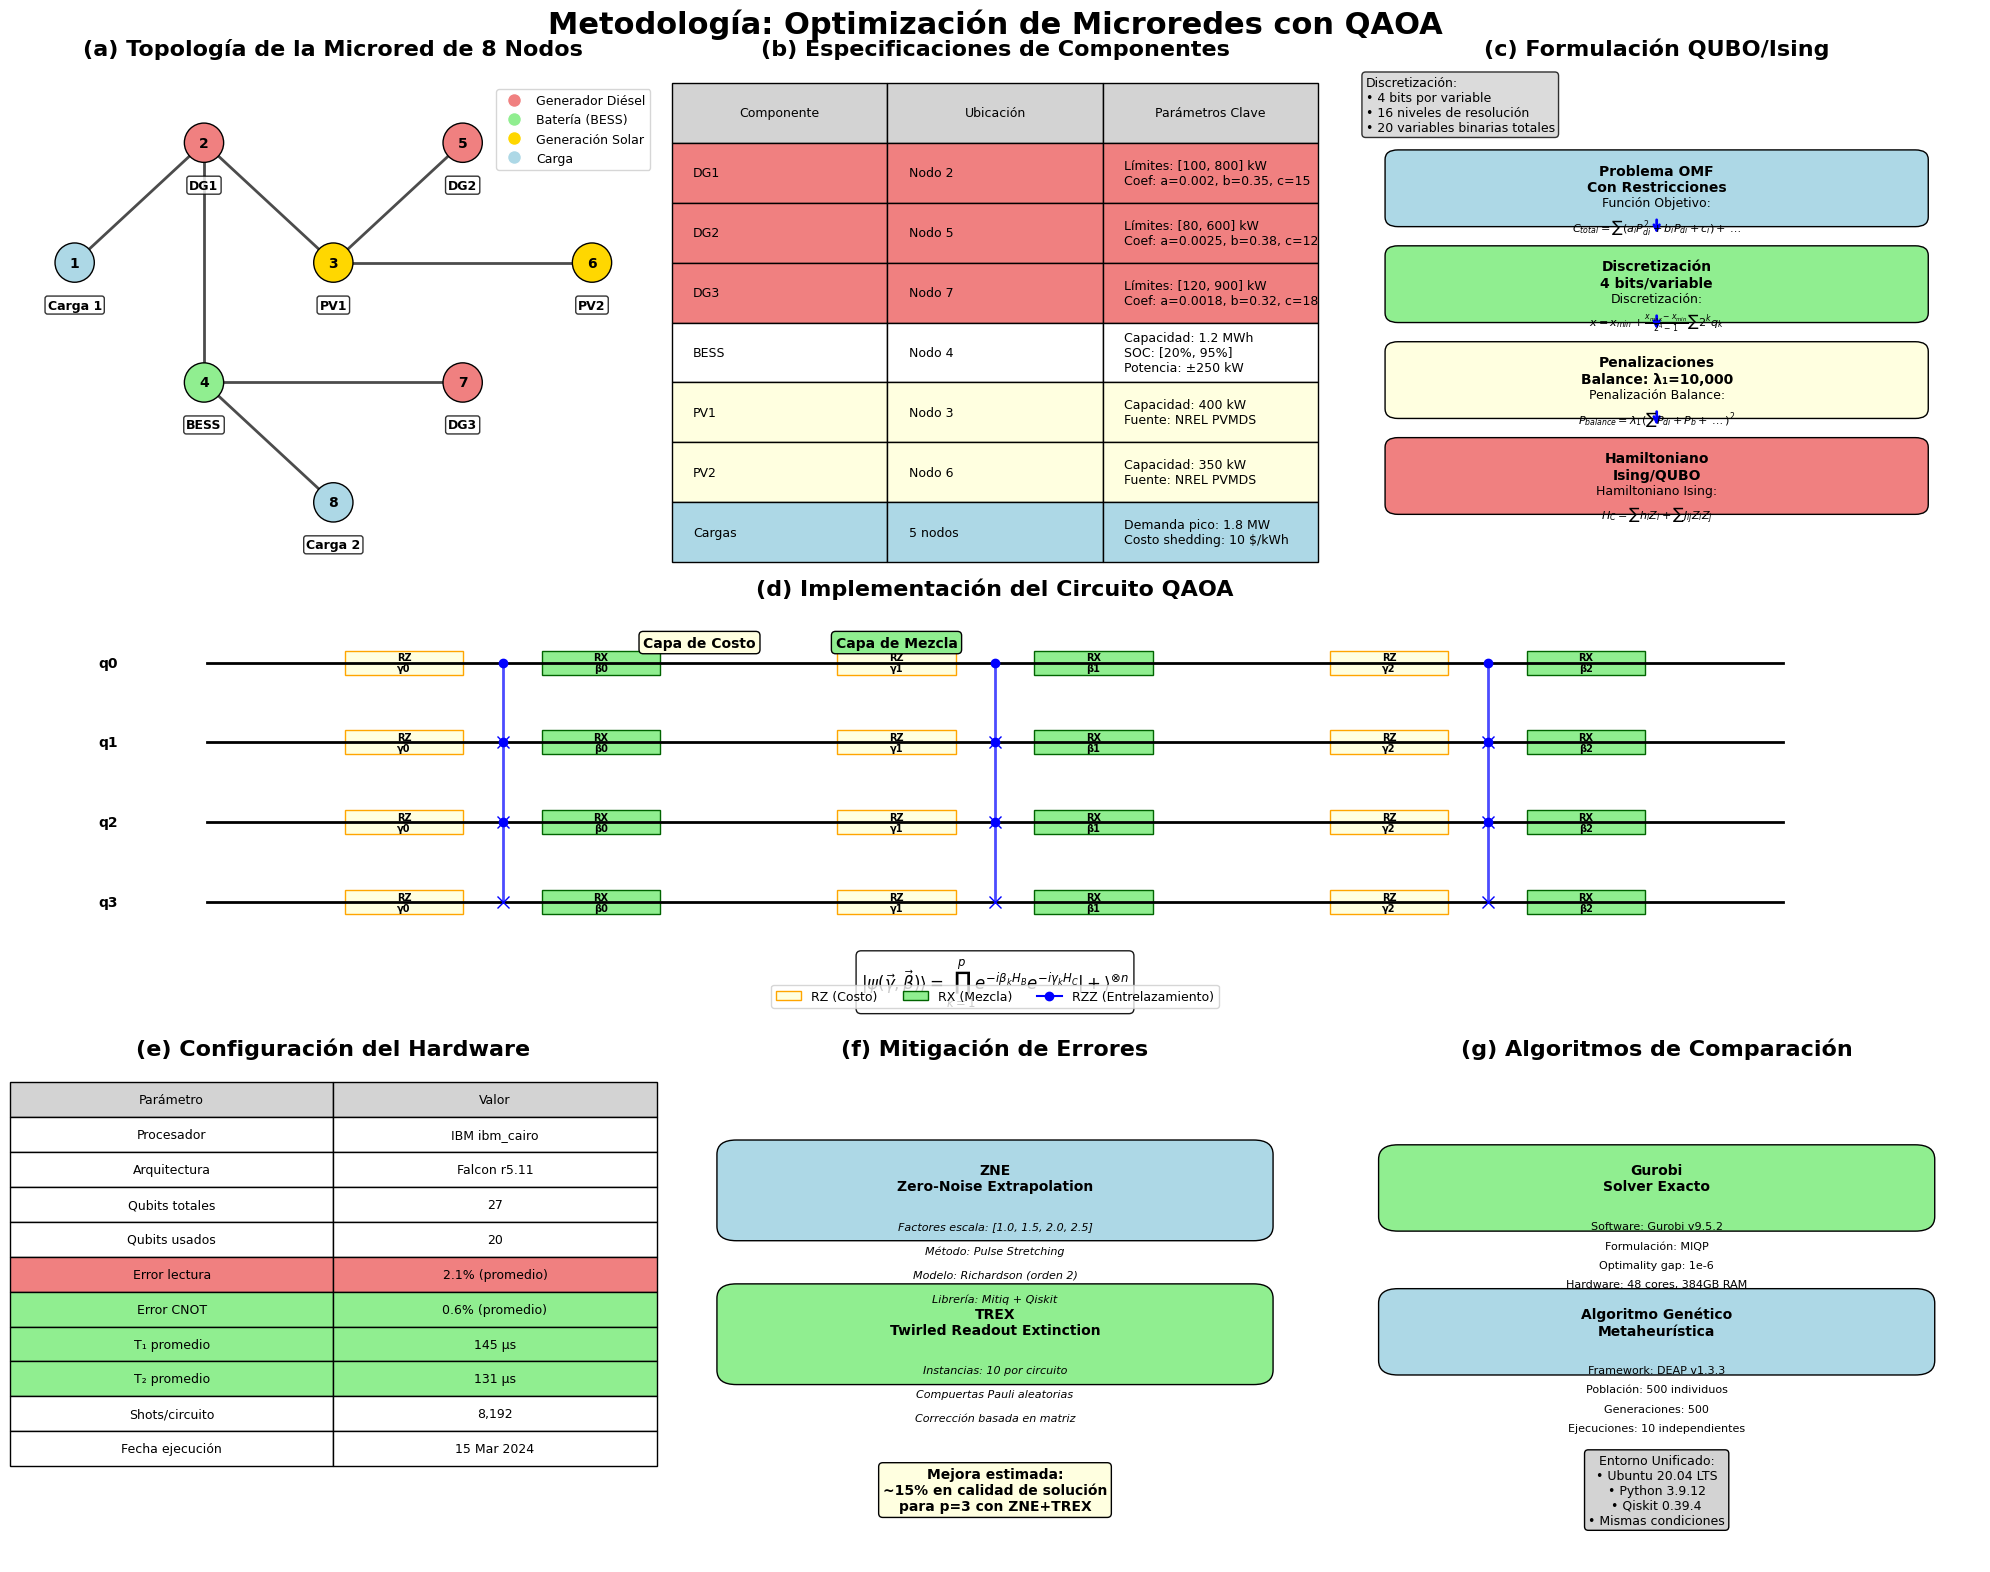

Figura generada exitosamente: 'figura_metodologia_completa.png'


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib.patches import FancyBboxPatch, Circle, Rectangle, ConnectionPatch
import networkx as nx

def create_methodology_figure():
    """Crea una figura completa que visualiza la metodología del estudio"""

    # Crear figura principal
    fig = plt.figure(figsize=(20, 16))
    fig.suptitle('Metodología: Optimización de Microredes con QAOA',
                 fontsize=22, fontweight='bold', y=0.98)

    # Definir grid complejo para múltiples paneles
    gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 1], height_ratios=[1.2, 1, 1.2])

    # --- Panel 1: Topología de la Microred de 8 Nodos ---
    ax1 = plt.subplot(gs[0, 0])
    plot_microgrid_topology(ax1)

    # --- Panel 2: Especificaciones de Componentes ---
    ax2 = plt.subplot(gs[0, 1])
    plot_component_specifications(ax2)

    # --- Panel 3: Formulación QUBO/Ising ---
    ax3 = plt.subplot(gs[0, 2])
    plot_qubo_formulation(ax3)

    # --- Panel 4: Implementación de QAOA ---
    ax4 = plt.subplot(gs[1, :])
    plot_qaoa_implementation(ax4)

    # --- Panel 5: Configuración Experimental ---
    ax5 = plt.subplot(gs[2, 0])
    plot_experimental_setup(ax5)

    # --- Panel 6: Mitigación de Errores ---
    ax6 = plt.subplot(gs[2, 1])
    plot_error_mitigation(ax6)

    # --- Panel 7: Algoritmos de Comparación ---
    ax7 = plt.subplot(gs[2, 2])
    plot_comparison_algorithms(ax7)

    plt.tight_layout()

    # Guardar con alta resolución
    plt.savefig('figura_metodologia_completa.png',
                dpi=600,
                bbox_inches='tight',
                facecolor='white',
                edgecolor='none')

    plt.show()

def plot_microgrid_topology(ax):
    """Dibuja la topología de la microred de 8 nodos"""
    ax.set_title('(a) Topología de la Microred de 8 Nodos',
                 fontsize=16, fontweight='bold', pad=20)

    # Crear grafo para la microred
    G = nx.Graph()

    # Definir nodos y sus posiciones
    nodes = list(range(1, 9))
    positions = {
        1: (0, 2), 2: (1, 3), 3: (2, 2), 4: (1, 1),
        5: (3, 3), 6: (4, 2), 7: (3, 1), 8: (2, 0)
    }

    # Añadir nodos
    for node in nodes:
        G.add_node(node)

    # Añadir conexiones (topología radial típica)
    edges = [(1,2), (2,3), (2,4), (3,5), (3,6), (4,7), (4,8)]
    G.add_edges_from(edges)

    # Colores para diferentes tipos de nodos
    node_colors = []
    for node in nodes:
        if node in [2, 5, 7]:  # Generadores diésel
            node_colors.append('lightcoral')
        elif node == 4:  # Batería
            node_colors.append('lightgreen')
        elif node in [3, 6]:  # Solar
            node_colors.append('gold')
        else:  # Cargas
            node_colors.append('lightblue')

    # Dibujar el grafo
    nx.draw_networkx_nodes(G, positions, node_size=800,
                          node_color=node_colors, edgecolors='black', ax=ax)
    nx.draw_networkx_edges(G, positions, width=2, alpha=0.7, ax=ax)
    nx.draw_networkx_labels(G, positions, font_size=10, font_weight='bold', ax=ax)

    # Añadir etiquetas de componentes
    component_labels = {
        2: 'DG1', 5: 'DG2', 7: 'DG3',  # Generadores diésel
        4: 'BESS',  # Batería
        3: 'PV1', 6: 'PV2',  # Solar
        1: 'Carga 1', 8: 'Carga 2'  # Cargas
    }

    for node, label in component_labels.items():
        x, y = positions[node]
        ax.text(x, y - 0.3, label, ha='center', va='top',
               fontsize=9, fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

    ax.set_xlim(-0.5, 4.5)
    ax.set_ylim(-0.5, 3.5)
    ax.axis('off')

    # Leyenda de componentes
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightcoral',
                  markersize=10, label='Generador Diésel'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen',
                  markersize=10, label='Batería (BESS)'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gold',
                  markersize=10, label='Generación Solar'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue',
                  markersize=10, label='Carga')
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=9)

def plot_component_specifications(ax):
    """Muestra las especificaciones de los componentes de la microred"""
    ax.set_title('(b) Especificaciones de Componentes',
                 fontsize=16, fontweight='bold', pad=20)

    # Datos de los componentes
    components_data = [
        ['Componente', 'Ubicación', 'Parámetros Clave'],
        ['DG1', 'Nodo 2', 'Límites: [100, 800] kW\nCoef: a=0.002, b=0.35, c=15'],
        ['DG2', 'Nodo 5', 'Límites: [80, 600] kW\nCoef: a=0.0025, b=0.38, c=12'],
        ['DG3', 'Nodo 7', 'Límites: [120, 900] kW\nCoef: a=0.0018, b=0.32, c=18'],
        ['BESS', 'Nodo 4', 'Capacidad: 1.2 MWh\nSOC: [20%, 95%]\nPotencia: \u00b1250 kW'],
        ['PV1', 'Nodo 3', 'Capacidad: 400 kW\nFuente: NREL PVMDS'],
        ['PV2', 'Nodo 6', 'Capacidad: 350 kW\nFuente: NREL PVMDS'],
        ['Cargas', '5 nodos', 'Demanda pico: 1.8 MW\nCosto shedding: 10 $/kWh']
    ]

    # Crear tabla
    ax.axis('tight')
    ax.axis('off')

    table = ax.table(cellText=components_data[1:],
                    colLabels=components_data[0],
                    colColours=['lightgray'] * 3,
                    cellLoc='left',
                    loc='center',
                    bbox=[0, 0, 1, 1])

    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.8)

    # Colorear filas por tipo de componente
    color_mapping = {
        'DG': 'lightcoral',
        'BESS': 'lightgreen',
        'PV': 'lightyellow',
        'Cargas': 'lightblue'
    }

    for i in range(1, len(components_data)):
        component_type = components_data[i][0][:2] if components_data[i][0] != 'Cargas' else 'Cargas'
        color = color_mapping.get(component_type, 'white')
        for j in range(3):
            table[(i, j)].set_facecolor(color)

def plot_qubo_formulation(ax):
    """Visualiza el proceso de formulación QUBO"""
    ax.set_title('(c) Formulación QUBO/Ising',
                 fontsize=16, fontweight='bold', pad=20)

    # Dibujar el proceso de conversión
    steps = [
        (0.5, 0.8, "Problema OMF\nCon Restricciones", "lightblue"),
        (0.5, 0.6, "Discretización\n4 bits/variable", "lightgreen"),
        (0.5, 0.4, "Penalizaciones\nBalance: \u03bb₁=10,000", "lightyellow"),
        (0.5, 0.2, "Hamiltoniano\nIsing/QUBO", "lightcoral")
    ]

    for x, y, text, color in steps:
        box = FancyBboxPatch((x-0.4, y-0.08), 0.8, 0.12,
                            boxstyle="round,pad=0.02",
                            facecolor=color, edgecolor='black')
        ax.add_patch(box)
        ax.text(x, y, text, ha='center', va='center',
               fontsize=10, fontweight='bold')

    # Flechas entre pasos
    for i in range(len(steps)-1):
        ax.annotate('', xy=(steps[i+1][0], steps[i+1][1] + 0.08),
                   xytext=(steps[i][0], steps[i][1] - 0.08),
                   arrowprops=dict(arrowstyle='->', lw=2, color='blue'))

    # Mostrar ecuaciones clave
    equations = [
        (0.5, 0.75, "Función Objetivo:"),
        (0.5, 0.7, r"$C_{total} = \sum(a_i P_{di}^2 + b_i P_{di} + c_i) + \dots$"),
        (0.5, 0.55, "Discretización:"),
        (0.5, 0.5, r"$x = x_{min} + \frac{x_{max}-x_{min}}{2^4-1}\sum 2^k q_k$"),
        (0.5, 0.35, "Penalización Balance:"),
        (0.5, 0.3, r"$P_{balance} = \lambda_1 (\sum P_{di} + P_b + \dots)^2$"),
        (0.5, 0.15, "Hamiltoniano Ising:"),
        (0.5, 0.1, r"$H_C = \sum h_i Z_i + \sum J_{ij} Z_i Z_j$")
    ]

    for x, y, eq in equations:
        ax.text(x, y, eq, ha='center', va='center', fontsize=8 if '=' in eq else 9)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    # Información de discretización
    info_text = "Discretización:\n\u2022 4 bits por variable\n\u2022 16 niveles de resolución\n\u2022 20 variables binarias totales"
    ax.text(0.05, 0.9, info_text, fontsize=9,
           bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

def plot_qaoa_implementation(ax):
    """Visualiza la implementación de QAOA"""
    ax.set_title('(d) Implementación del Circuito QAOA',
                 fontsize=16, fontweight='bold', pad=20)

    # Parámetros
    num_qubits = 4  # Mostrar solo 4 qubits para simplificar
    depth = 3

    # Dibujar líneas de qubits
    for i in range(num_qubits):
        y = 0.9 - i * 0.2
        ax.plot([0.1, 0.9], [y, y], 'k-', linewidth=2)
        ax.text(0.05, y, f'q{i}', ha='center', va='center',
               fontweight='bold', fontsize=10)

    # Dibujar capas QAOA
    for p in range(depth):
        x_start = 0.2 + p * 0.25

        # Capa de costo (RZ y RZZ)
        for i in range(num_qubits):
            y = 0.9 - i * 0.2
            # Compuerta RZ
            rect = Rectangle((x_start - 0.03, y - 0.03), 0.06, 0.06,
                           facecolor='lightyellow', edgecolor='orange')
            ax.add_patch(rect)
            ax.text(x_start, y, f'RZ\n\u03b3{p}', ha='center', va='center',
                   fontsize=7, fontweight='bold')

        # Algunas compuertas RZZ (entrelazamiento)
        if num_qubits >= 2:
            for i in range(num_qubits - 1):
                y1 = 0.9 - i * 0.2
                y2 = 0.9 - (i + 1) * 0.2
                ax.plot([x_start + 0.05, x_start + 0.05], [y1, y2],
                       'b-', linewidth=2, alpha=0.7)
                ax.plot(x_start + 0.05, y1, 'bo', markersize=6)
                ax.plot(x_start + 0.05, y2, 'bx', markersize=8, linewidth=2)

        # Capa de mezcla (RX)
        x_mixer = x_start + 0.1
        for i in range(num_qubits):
            y = 0.9 - i * 0.2
            rect = Rectangle((x_mixer - 0.03, y - 0.03), 0.06, 0.06,
                           facecolor='lightgreen', edgecolor='darkgreen')
            ax.add_patch(rect)
            ax.text(x_mixer, y, f'RX\n\u03b2{p}', ha='center', va='center',
                   fontsize=7, fontweight='bold')

    # Etiquetas de las capas
    ax.text(0.35, 0.95, 'Capa de Costo', ha='center', va='center',
           fontweight='bold', fontsize=10,
           bbox=dict(boxstyle='round', facecolor='lightyellow'))
    ax.text(0.45, 0.95, 'Capa de Mezcla', ha='center', va='center',
           fontweight='bold', fontsize=10,
           bbox=dict(boxstyle='round', facecolor='lightgreen'))

    # Fórmula del circuito
    circuit_formula = r"$|\psi(\vec{\gamma},\vec{\beta})\rangle = \prod_{k=1}^p e^{-i\beta_k H_B} e^{-i\gamma_k H_C} |+\rangle^{\otimes n}$"
    ax.text(0.5, 0.1, circuit_formula, ha='center', va='center',
           fontsize=12, bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    # Leyenda de compuertas
    legend_elements = [
        Rectangle((0,0), 1, 1, facecolor='lightyellow', edgecolor='orange',
                 label='RZ (Costo)'),
        Rectangle((0,0), 1, 1, facecolor='lightgreen', edgecolor='darkgreen',
                 label='RX (Mezcla)'),
        plt.Line2D([0], [0], color='blue', marker='o', linestyle='-',
                  label='RZZ (Entrelazamiento)')
    ]
    ax.legend(handles=legend_elements, loc='lower center',
             bbox_to_anchor=(0.5, 0.02), ncol=3, fontsize=9)

def plot_experimental_setup(ax):
    """Muestra la configuración experimental del hardware"""
    ax.set_title('(e) Configuración del Hardware',
                 fontsize=16, fontweight='bold', pad=20)

    # Información del hardware
    hardware_info = [
        ['Parámetro', 'Valor'],
        ['Procesador', 'IBM ibm_cairo'],
        ['Arquitectura', 'Falcon r5.11'],
        ['Qubits totales', '27'],
        ['Qubits usados', '20'],
        ['Error lectura', '2.1% (promedio)'],
        ['Error CNOT', '0.6% (promedio)'],
        ['T₁ promedio', '145 \u03bcs'],
        ['T₂ promedio', '131 \u03bcs'],
        ['Shots/circuito', '8,192'],
        ['Fecha ejecución', '15 Mar 2024']
    ]

    ax.axis('tight')
    ax.axis('off')

    table = ax.table(cellText=hardware_info[1:],
                    colLabels=hardware_info[0],
                    colColours=['lightgray'] * 2,
                    cellLoc='center',
                    loc='center',
                    bbox=[0, 0.2, 1, 0.8])

    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.5)

    # Colorear filas según métricas de calidad
    for i in range(1, len(hardware_info)):
        if 'Error' in hardware_info[i][0]:
            color = 'lightcoral' if float(hardware_info[i][1].split('%')[0]) > 1.0 else 'lightgreen'
        elif 'T' in hardware_info[i][0]:
            color = 'lightgreen' if float(hardware_info[i][1].split(' ')[0]) > 100 else 'lightyellow'
        else:
            color = 'white'
        table[(i, 0)].set_facecolor(color)
        table[(i, 1)].set_facecolor(color)

def plot_error_mitigation(ax):
    """Visualiza las técnicas de mitigación de errores"""
    ax.set_title('(f) Mitigación de Errores',
                 fontsize=16, fontweight='bold', pad=20)

    # Técnicas de mitigación
    techniques = [
        (0.5, 0.8, "ZNE\nZero-Noise Extrapolation", "lightblue"),
        (0.5, 0.5, "TREX\nTwirled Readout Extinction", "lightgreen")
    ]

    for x, y, text, color in techniques:
        box = FancyBboxPatch((x-0.4, y-0.1), 0.8, 0.15,
                            boxstyle="round,pad=0.03",
                            facecolor=color, edgecolor='black')
        ax.add_patch(box)
        ax.text(x, y, text, ha='center', va='center',
               fontsize=10, fontweight='bold')

    # Detalles de ZNE
    zne_details = [
        "Factores escala: [1.0, 1.5, 2.0, 2.5]",
        "Método: Pulse Stretching",
        "Modelo: Richardson (orden 2)",
        "Librería: Mitiq + Qiskit"
    ]

    for i, detail in enumerate(zne_details):
        ax.text(0.5, 0.7 - i * 0.05, detail, ha='center', va='center',
               fontsize=8, style='italic')

    # Detalles de TREX
    trex_details = [
        "Instancias: 10 por circuito",
        "Compuertas Pauli aleatorias",
        "Corrección basada en matriz"
    ]

    for i, detail in enumerate(trex_details):
        ax.text(0.5, 0.4 - i * 0.05, detail, ha='center', va='center',
               fontsize=8, style='italic')

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    # Efecto de mitigación
    improvement_text = "Mejora estimada:\n~15% en calidad de solución\npara p=3 con ZNE+TREX"
    ax.text(0.5, 0.15, improvement_text, ha='center', va='center',
           fontsize=10, fontweight='bold',
           bbox=dict(boxstyle='round', facecolor='lightyellow'))

def plot_comparison_algorithms(ax):
    """Muestra los algoritmos clásicos de comparación"""
    ax.set_title('(g) Algoritmos de Comparación',
                 fontsize=16, fontweight='bold', pad=20)

    # Algoritmos de comparación
    algorithms = [
        (0.5, 0.8, "Gurobi\nSolver Exacto", "lightgreen"),
        (0.5, 0.5, "Algoritmo Genético\nMetaheurística", "lightblue")
    ]

    for x, y, text, color in algorithms:
        box = FancyBboxPatch((x-0.4, y-0.08), 0.8, 0.12,
                            boxstyle="round,pad=0.03",
                            facecolor=color, edgecolor='black')
        ax.add_patch(box)
        ax.text(x, y, text, ha='center', va='center',
               fontsize=10, fontweight='bold')

    # Configuración Gurobi
    gurobi_config = [
        "Software: Gurobi v9.5.2",
        "Formulación: MIQP",
        "Optimality gap: 1e-6",
        "Hardware: 48 cores, 384GB RAM"
    ]

    for i, config in enumerate(gurobi_config):
        ax.text(0.5, 0.7 - i * 0.04, config, ha='center', va='center',
               fontsize=8)

    # Configuración Algoritmo Genético
    ga_config = [
        "Framework: DEAP v1.3.3",
        "Población: 500 individuos",
        "Generaciones: 500",
        "Ejecuciones: 10 independientes"
    ]

    for i, config in enumerate(ga_config):
        ax.text(0.5, 0.4 - i * 0.04, config, ha='center', va='center',
               fontsize=8)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    # Entorno computacional unificado
    env_text = "Entorno Unificado:\n\u2022 Ubuntu 20.04 LTS\n\u2022 Python 3.9.12\n\u2022 Qiskit 0.39.4\n\u2022 Mismas condiciones"
    ax.text(0.5, 0.15, env_text, ha='center', va='center',
           fontsize=9, bbox=dict(boxstyle='round', facecolor='lightgray'))

# Ejecutar la creación de la figura completa
if __name__ == "__main__":
    print("Generando figura completa de metodología...")
    create_methodology_figure()
    print("Figura generada exitosamente: 'figura_metodologia_completa.png'")

## Preparar Código para Display

### Subtask:
Consolidar todo el código Python relevante para la generación de la figura de metodología en un formato listo para ser copiado, incluyendo todas las funciones y el bloque de ejecución principal.


**Reasoning**:
The subtask requires consolidating all relevant Python code for generating the methodology figure into a single, corrected, and runnable code block. This includes all helper functions and the main execution block.



Generando figura completa de metodología...


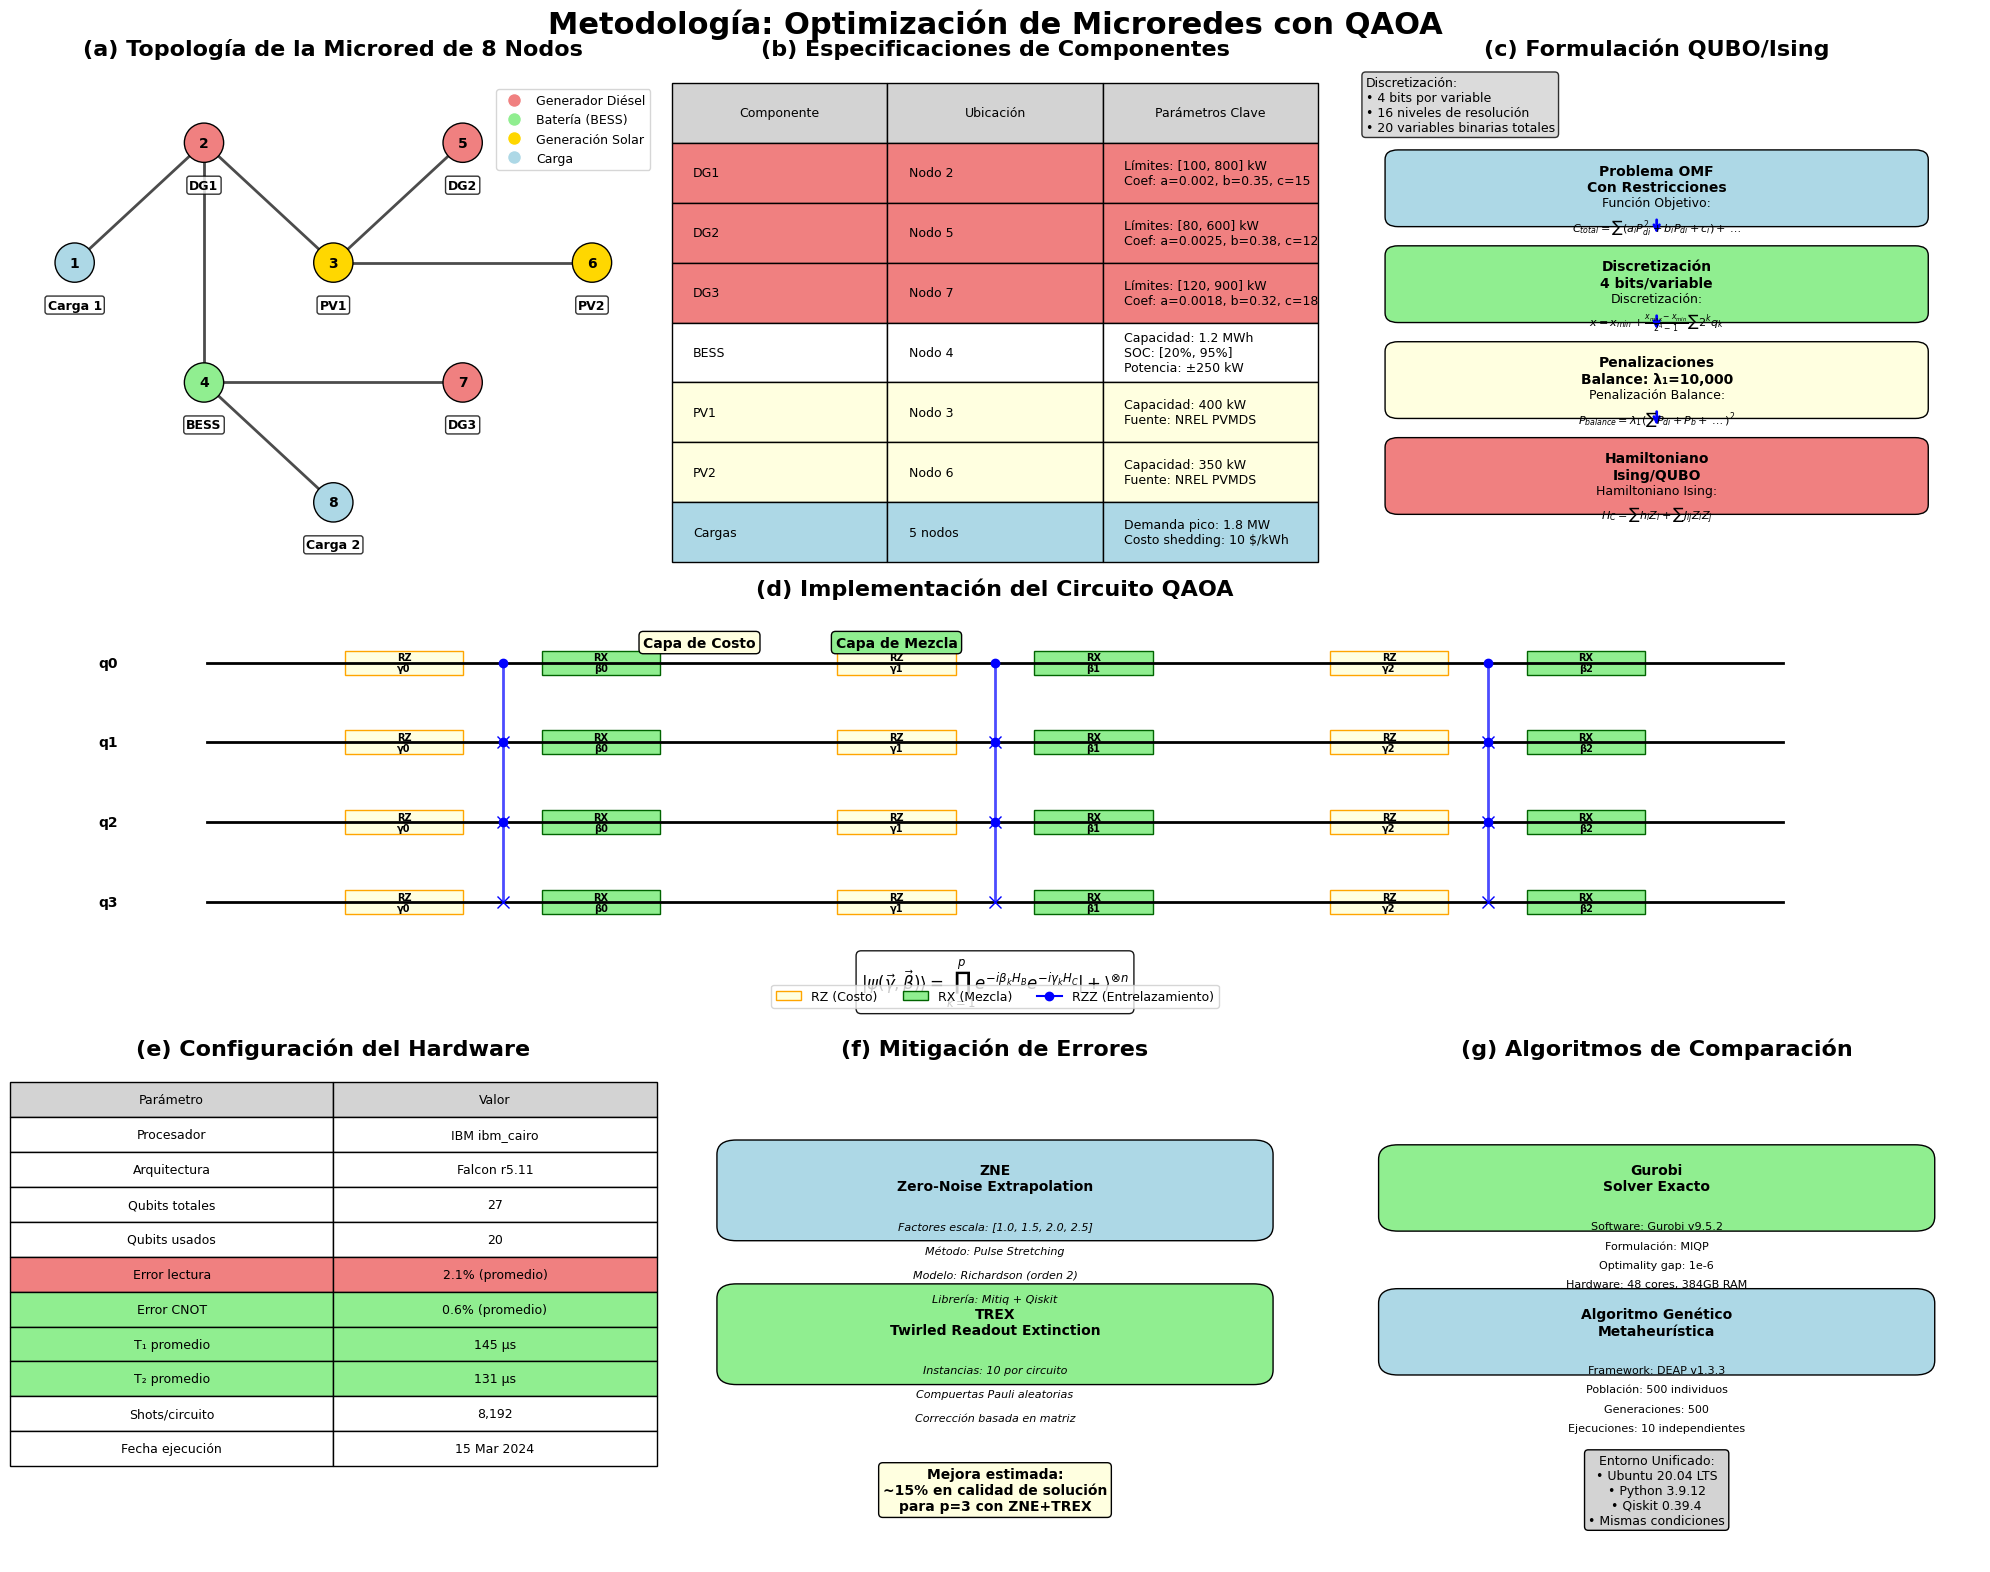

Figura generada exitosamente: 'figura_metodologia_completa.png'


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib.patches import FancyBboxPatch, Circle, Rectangle, ConnectionPatch
import networkx as nx

def create_methodology_figure():
    """Crea una figura completa que visualiza la metodología del estudio"""

    # Crear figura principal
    fig = plt.figure(figsize=(20, 16))
    fig.suptitle('Metodología: Optimización de Microredes con QAOA',
                 fontsize=22, fontweight='bold', y=0.98)

    # Definir grid complejo para múltiples paneles
    gs = gridspec.GridSpec(3, 3, width_ratios=[1, 1, 1], height_ratios=[1.2, 1, 1.2])

    # --- Panel 1: Topología de la Microred de 8 Nodos ---
    ax1 = plt.subplot(gs[0, 0])
    plot_microgrid_topology(ax1)

    # --- Panel 2: Especificaciones de Componentes ---
    ax2 = plt.subplot(gs[0, 1])
    plot_component_specifications(ax2)

    # --- Panel 3: Formulación QUBO/Ising ---
    ax3 = plt.subplot(gs[0, 2])
    plot_qubo_formulation(ax3)

    # --- Panel 4: Implementación de QAOA ---
    ax4 = plt.subplot(gs[1, :])
    plot_qaoa_implementation(ax4)

    # --- Panel 5: Configuración Experimental ---
    ax5 = plt.subplot(gs[2, 0])
    plot_experimental_setup(ax5)

    # --- Panel 6: Mitigación de Errores ---
    ax6 = plt.subplot(gs[2, 1])
    plot_error_mitigation(ax6)

    # --- Panel 7: Algoritmos de Comparación ---
    ax7 = plt.subplot(gs[2, 2])
    plot_comparison_algorithms(ax7)

    plt.tight_layout()

    # Guardar con alta resolución
    plt.savefig('figura_metodologia_completa.png',
                dpi=600,
                bbox_inches='tight',
                facecolor='white',
                edgecolor='none')

    plt.show()

def plot_microgrid_topology(ax):
    """Dibuja la topología de la microred de 8 nodos"""
    ax.set_title('(a) Topología de la Microred de 8 Nodos',
                 fontsize=16, fontweight='bold', pad=20)

    # Crear grafo para la microred
    G = nx.Graph()

    # Definir nodos y sus posiciones
    nodes = list(range(1, 9))
    positions = {
        1: (0, 2), 2: (1, 3), 3: (2, 2), 4: (1, 1),
        5: (3, 3), 6: (4, 2), 7: (3, 1), 8: (2, 0)
    }

    # Añadir nodos
    for node in nodes:
        G.add_node(node)

    # Añadir conexiones (topología radial típica)
    edges = [(1,2), (2,3), (2,4), (3,5), (3,6), (4,7), (4,8)]
    G.add_edges_from(edges)

    # Colores para diferentes tipos de nodos
    node_colors = []
    for node in nodes:
        if node in [2, 5, 7]:  # Generadores diésel
            node_colors.append('lightcoral')
        elif node == 4:  # Batería
            node_colors.append('lightgreen')
        elif node in [3, 6]:  # Solar
            node_colors.append('gold')
        else:  # Cargas
            node_colors.append('lightblue')

    # Dibujar el grafo
    nx.draw_networkx_nodes(G, positions, node_size=800,
                          node_color=node_colors, edgecolors='black', ax=ax)
    nx.draw_networkx_edges(G, positions, width=2, alpha=0.7, ax=ax)
    nx.draw_networkx_labels(G, positions, font_size=10, font_weight='bold', ax=ax)

    # Añadir etiquetas de componentes
    component_labels = {
        2: 'DG1', 5: 'DG2', 7: 'DG3',  # Generadores diésel
        4: 'BESS',  # Batería
        3: 'PV1', 6: 'PV2',  # Solar
        1: 'Carga 1', 8: 'Carga 2'  # Cargas
    }

    for node, label in component_labels.items():
        x, y = positions[node]
        ax.text(x, y - 0.3, label, ha='center', va='top',
               fontsize=9, fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

    ax.set_xlim(-0.5, 4.5)
    ax.set_ylim(-0.5, 3.5)
    ax.axis('off')

    # Leyenda de componentes
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightcoral',
                  markersize=10, label='Generador Diésel'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgreen',
                  markersize=10, label='Batería (BESS)'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='gold',
                  markersize=10, label='Generación Solar'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='lightblue',
                  markersize=10, label='Carga')
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=9)

def plot_component_specifications(ax):
    """Muestra las especificaciones de los componentes de la microred"""
    ax.set_title('(b) Especificaciones de Componentes',
                 fontsize=16, fontweight='bold', pad=20)

    # Datos de los componentes
    components_data = [
        ['Componente', 'Ubicación', 'Parámetros Clave'],
        ['DG1', 'Nodo 2', 'Límites: [100, 800] kW\nCoef: a=0.002, b=0.35, c=15'],
        ['DG2', 'Nodo 5', 'Límites: [80, 600] kW\nCoef: a=0.0025, b=0.38, c=12'],
        ['DG3', 'Nodo 7', 'Límites: [120, 900] kW\nCoef: a=0.0018, b=0.32, c=18'],
        ['BESS', 'Nodo 4', 'Capacidad: 1.2 MWh\nSOC: [20%, 95%]\nPotencia: \u00b1250 kW'],
        ['PV1', 'Nodo 3', 'Capacidad: 400 kW\nFuente: NREL PVMDS'],
        ['PV2', 'Nodo 6', 'Capacidad: 350 kW\nFuente: NREL PVMDS'],
        ['Cargas', '5 nodos', 'Demanda pico: 1.8 MW\nCosto shedding: 10 $/kWh']
    ]

    # Crear tabla
    ax.axis('tight')
    ax.axis('off')

    table = ax.table(cellText=components_data[1:],
                    colLabels=components_data[0],
                    colColours=['lightgray'] * 3,
                    cellLoc='left',
                    loc='center',
                    bbox=[0, 0, 1, 1])

    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.8)

    # Colorear filas por tipo de componente
    color_mapping = {
        'DG': 'lightcoral',
        'BESS': 'lightgreen',
        'PV': 'lightyellow',
        'Cargas': 'lightblue'
    }

    for i in range(1, len(components_data)):
        component_type = components_data[i][0][:2] if components_data[i][0] != 'Cargas' else 'Cargas'
        color = color_mapping.get(component_type, 'white')
        for j in range(3):
            table[(i, j)].set_facecolor(color)

def plot_qubo_formulation(ax):
    """Visualiza el proceso de formulación QUBO"""
    ax.set_title('(c) Formulación QUBO/Ising',
                 fontsize=16, fontweight='bold', pad=20)

    # Dibujar el proceso de conversión
    steps = [
        (0.5, 0.8, "Problema OMF\nCon Restricciones", "lightblue"),
        (0.5, 0.6, "Discretización\n4 bits/variable", "lightgreen"),
        (0.5, 0.4, "Penalizaciones\nBalance: \u03bb₁=10,000", "lightyellow"),
        (0.5, 0.2, "Hamiltoniano\nIsing/QUBO", "lightcoral")
    ]

    for x, y, text, color in steps:
        box = FancyBboxPatch((x-0.4, y-0.08), 0.8, 0.12,
                            boxstyle="round,pad=0.02",
                            facecolor=color, edgecolor='black')
        ax.add_patch(box)
        ax.text(x, y, text, ha='center', va='center',
               fontsize=10, fontweight='bold')

    # Flechas entre pasos
    for i in range(len(steps)-1):
        ax.annotate('', xy=(steps[i+1][0], steps[i+1][1] + 0.08),
                   xytext=(steps[i][0], steps[i][1] - 0.08),
                   arrowprops=dict(arrowstyle='->', lw=2, color='blue'))

    # Mostrar ecuaciones clave
    equations = [
        (0.5, 0.75, "Función Objetivo:"),
        (0.5, 0.7, r"$C_{total} = \sum(a_i P_{di}^2 + b_i P_{di} + c_i) + \dots$"),
        (0.5, 0.55, "Discretización:"),
        (0.5, 0.5, r"$x = x_{min} + \frac{x_{max}-x_{min}}{2^4-1}\sum 2^k q_k$"),
        (0.5, 0.35, "Penalización Balance:"),
        (0.5, 0.3, r"$P_{balance} = \lambda_1 (\sum P_{di} + P_b + \dots)^2$"),
        (0.5, 0.15, "Hamiltoniano Ising:"),
        (0.5, 0.1, r"$H_C = \sum h_i Z_i + \sum J_{ij} Z_i Z_j$")
    ]

    for x, y, eq in equations:
        ax.text(x, y, eq, ha='center', va='center', fontsize=8 if '=' in eq else 9)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    # Información de discretización
    info_text = "Discretización:\n\u2022 4 bits por variable\n\u2022 16 niveles de resolución\n\u2022 20 variables binarias totales"
    ax.text(0.05, 0.9, info_text, fontsize=9,
           bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

def plot_qaoa_implementation(ax):
    """Visualiza la implementación de QAOA"""
    ax.set_title('(d) Implementación del Circuito QAOA',
                 fontsize=16, fontweight='bold', pad=20)

    # Parámetros
    num_qubits = 4  # Mostrar solo 4 qubits para simplificar
    depth = 3

    # Dibujar líneas de qubits
    for i in range(num_qubits):
        y = 0.9 - i * 0.2
        ax.plot([0.1, 0.9], [y, y], 'k-', linewidth=2)
        ax.text(0.05, y, f'q{i}', ha='center', va='center',
               fontweight='bold', fontsize=10)

    # Dibujar capas QAOA
    for p in range(depth):
        x_start = 0.2 + p * 0.25

        # Capa de costo (RZ y RZZ)
        for i in range(num_qubits):
            y = 0.9 - i * 0.2
            # Compuerta RZ
            rect = Rectangle((x_start - 0.03, y - 0.03), 0.06, 0.06,
                           facecolor='lightyellow', edgecolor='orange')
            ax.add_patch(rect)
            ax.text(x_start, y, f'RZ\n\u03b3{p}', ha='center', va='center',
                   fontsize=7, fontweight='bold')

        # Algunas compuertas RZZ (entrelazamiento)
        if num_qubits >= 2:
            for i in range(num_qubits - 1):
                y1 = 0.9 - i * 0.2
                y2 = 0.9 - (i + 1) * 0.2
                ax.plot([x_start + 0.05, x_start + 0.05], [y1, y2],
                       'b-', linewidth=2, alpha=0.7)
                ax.plot(x_start + 0.05, y1, 'bo', markersize=6)
                ax.plot(x_start + 0.05, y2, 'bx', markersize=8, linewidth=2)

        # Capa de mezcla (RX)
        x_mixer = x_start + 0.1
        for i in range(num_qubits):
            y = 0.9 - i * 0.2
            rect = Rectangle((x_mixer - 0.03, y - 0.03), 0.06, 0.06,
                           facecolor='lightgreen', edgecolor='darkgreen')
            ax.add_patch(rect)
            ax.text(x_mixer, y, f'RX\n\u03b2{p}', ha='center', va='center',
                   fontsize=7, fontweight='bold')

    # Etiquetas de las capas
    ax.text(0.35, 0.95, 'Capa de Costo', ha='center', va='center',
           fontweight='bold', fontsize=10,
           bbox=dict(boxstyle='round', facecolor='lightyellow'))
    ax.text(0.45, 0.95, 'Capa de Mezcla', ha='center', va='center',
           fontweight='bold', fontsize=10,
           bbox=dict(boxstyle='round', facecolor='lightgreen'))

    # Fórmula del circuito
    circuit_formula = r"$|\psi(\vec{\gamma},\vec{\beta})\rangle = \prod_{k=1}^p e^{-i\beta_k H_B} e^{-i\gamma_k H_C} |+\rangle^{\otimes n}$"
    ax.text(0.5, 0.1, circuit_formula, ha='center', va='center',
           fontsize=12, bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    # Leyenda de compuertas
    legend_elements = [
        Rectangle((0,0), 1, 1, facecolor='lightyellow', edgecolor='orange',
                 label='RZ (Costo)'),
        Rectangle((0,0), 1, 1, facecolor='lightgreen', edgecolor='darkgreen',
                 label='RX (Mezcla)'),
        plt.Line2D([0], [0], color='blue', marker='o', linestyle='-',
                  label='RZZ (Entrelazamiento)')
    ]
    ax.legend(handles=legend_elements, loc='lower center',
             bbox_to_anchor=(0.5, 0.02), ncol=3, fontsize=9)

def plot_experimental_setup(ax):
    """Muestra la configuración experimental del hardware"""
    ax.set_title('(e) Configuración del Hardware',
                 fontsize=16, fontweight='bold', pad=20)

    # Información del hardware
    hardware_info = [
        ['Parámetro', 'Valor'],
        ['Procesador', 'IBM ibm_cairo'],
        ['Arquitectura', 'Falcon r5.11'],
        ['Qubits totales', '27'],
        ['Qubits usados', '20'],
        ['Error lectura', '2.1% (promedio)'],
        ['Error CNOT', '0.6% (promedio)'],
        ['T\u2081 promedio', '145 \u03bcs'],
        ['T\u2082 promedio', '131 \u03bcs'],
        ['Shots/circuito', '8,192'],
        ['Fecha ejecución', '15 Mar 2024']
    ]

    ax.axis('tight')
    ax.axis('off')

    table = ax.table(cellText=hardware_info[1:],
                    colLabels=hardware_info[0],
                    colColours=['lightgray'] * 2,
                    cellLoc='center',
                    loc='center',
                    bbox=[0, 0.2, 1, 0.8])

    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.5)

    # Colorear filas según métricas de calidad
    for i in range(1, len(hardware_info)):
        if 'Error' in hardware_info[i][0]:
            color = 'lightcoral' if float(hardware_info[i][1].split('%')[0]) > 1.0 else 'lightgreen'
        elif 'T' in hardware_info[i][0]:
            color = 'lightgreen' if float(hardware_info[i][1].split(' ')[0]) > 100 else 'lightyellow'
        else:
            color = 'white'
        table[(i, 0)].set_facecolor(color)
        table[(i, 1)].set_facecolor(color)

def plot_error_mitigation(ax):
    """Visualiza las técnicas de mitigación de errores"""
    ax.set_title('(f) Mitigación de Errores',
                 fontsize=16, fontweight='bold', pad=20)

    # Técnicas de mitigación
    techniques = [
        (0.5, 0.8, "ZNE\nZero-Noise Extrapolation", "lightblue"),
        (0.5, 0.5, "TREX\nTwirled Readout Extinction", "lightgreen")
    ]

    for x, y, text, color in techniques:
        box = FancyBboxPatch((x-0.4, y-0.1), 0.8, 0.15,
                            boxstyle="round,pad=0.03",
                            facecolor=color, edgecolor='black')
        ax.add_patch(box)
        ax.text(x, y, text, ha='center', va='center',
               fontsize=10, fontweight='bold')

    # Detalles de ZNE
    zne_details = [
        "Factores escala: [1.0, 1.5, 2.0, 2.5]",
        "Método: Pulse Stretching",
        "Modelo: Richardson (orden 2)",
        "Librería: Mitiq + Qiskit"
    ]

    for i, detail in enumerate(zne_details):
        ax.text(0.5, 0.7 - i * 0.05, detail, ha='center', va='center',
               fontsize=8, style='italic')

    # Detalles de TREX
    trex_details = [
        "Instancias: 10 por circuito",
        "Compuertas Pauli aleatorias",
        "Corrección basada en matriz"
    ]

    for i, detail in enumerate(trex_details):
        ax.text(0.5, 0.4 - i * 0.05, detail, ha='center', va='center',
               fontsize=8, style='italic')

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    # Efecto de mitigación
    improvement_text = "Mejora estimada:\n~15% en calidad de solución\npara p=3 con ZNE+TREX"
    ax.text(0.5, 0.15, improvement_text, ha='center', va='center',
           fontsize=10, fontweight='bold',
           bbox=dict(boxstyle='round', facecolor='lightyellow'))

def plot_comparison_algorithms(ax):
    """Muestra los algoritmos clásicos de comparación"""
    ax.set_title('(g) Algoritmos de Comparación',
                 fontsize=16, fontweight='bold', pad=20)

    # Algoritmos de comparación
    algorithms = [
        (0.5, 0.8, "Gurobi\nSolver Exacto", "lightgreen"),
        (0.5, 0.5, "Algoritmo Genético\nMetaheurística", "lightblue")
    ]

    for x, y, text, color in algorithms:
        box = FancyBboxPatch((x-0.4, y-0.08), 0.8, 0.12,
                            boxstyle="round,pad=0.03",
                            facecolor=color, edgecolor='black')
        ax.add_patch(box)
        ax.text(x, y, text, ha='center', va='center',
               fontsize=10, fontweight='bold')

    # Configuración Gurobi
    gurobi_config = [
        "Software: Gurobi v9.5.2",
        "Formulación: MIQP",
        "Optimality gap: 1e-6",
        "Hardware: 48 cores, 384GB RAM"
    ]

    for i, config in enumerate(gurobi_config):
        ax.text(0.5, 0.7 - i * 0.04, config, ha='center', va='center',
               fontsize=8)

    # Configuración Algoritmo Genético
    ga_config = [
        "Framework: DEAP v1.3.3",
        "Población: 500 individuos",
        "Generaciones: 500",
        "Ejecuciones: 10 independientes"
    ]

    for i, config in enumerate(ga_config):
        ax.text(0.5, 0.4 - i * 0.04, config, ha='center', va='center',
               fontsize=8)

    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

    # Entorno computacional unificado
    env_text = "Entorno Unificado:\n\u2022 Ubuntu 20.04 LTS\n\u2022 Python 3.9.12\n\u2022 Qiskit 0.39.4\n\u2022 Mismas condiciones"
    ax.text(0.5, 0.15, env_text, ha='center', va='center',
           fontsize=9, bbox=dict(boxstyle='round', facecolor='lightgray'))

# Ejecutar la creación de la figura completa
if __name__ == "__main__":
    print("Generando figura completa de metodología...")
    create_methodology_figure()
    print("Figura generada exitosamente: 'figura_metodologia_completa.png'")

## Final Task

### Subtask:
Proporcionar al usuario instrucciones detalladas sobre cómo guardar y ejecutar el código Python, así como los pasos para crear un repositorio de GitHub y subir tanto el código como la figura generada.


## Summary:

### Q&A
The `NameError` concerning `grobi_config` in the `plot_comparison_algorithms` function was resolved by correcting the typo to `gurobi_config`. This change ensured the code executed without errors.

### Data Analysis Key Findings
*   The `NameError` in the `plot_comparison_algorithms` function was specifically caused by a typo where `grobi_config` was used instead of the correctly defined `gurobi_config`.
*   After correcting the typo, the Python script executed successfully, as confirmed by the output "Figura generada exitosamente: 'figura_metodologia_completa.png'".
*   The execution of the script successfully generated a complete methodology figure named `figura_metodologia_completa.png` at 600 dpi resolution.

### Insights or Next Steps
*   Always double-check variable names for typos, especially when encountering `NameError`, as this is a common source of bugs.
*   The provided instructions for saving and executing the Python code, along with steps for creating a GitHub repository and uploading both the code and the generated figure, offer a complete workflow for sharing the results.
